<a href="https://colab.research.google.com/github/smarulandas/Teoria_Aprendizaje_De_Maquina_-Machine_Learning-/blob/main/DL_Keras_API_funcional_5_TALLER_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Nota: escoja un subconjunto aleatorio de 4000 datos para que el algoritmo t-SNE converja sin problemas de memoría.

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

###Punto 1:

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

# plt.imshow(images[10000,:,:], cmap = 'binary')
# plt.show()
# print(np.unique(labels))

# Normalización de los valores de los pixeles
images = images / 255.
x, y = test
x = x / 255.

#arquitectura funcional
tf.keras.backend.clear_session()

input_l = tf.keras.layers.Input(shape = (images.shape[1], images.shape[2]), name = 'Input')
flatten = tf.keras.layers.Flatten(input_shape = (images.shape[1], images.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200, activation = 'tanh', name = 'h1')(flatten)
h2 = tf.keras.layers.Dense(50, activation = 'tanh', name = 'h2')(h1)
concatenate = tf.keras.layers.concatenate([h2, flatten])
output_lA = tf.keras.layers.Dense(10, activation = "softmax", name = 'OutputA')(h2)
output_lB = tf.keras.layers.Dense(10, activation = "softmax", name = 'OutputB')(concatenate)

model = tf.keras.Model(inputs = input_l, outputs = [output_lA, output_lB])
# model.summary()
# tf.keras.utils.plot_model(model)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy","accuracy"])

history = model.fit(images, [labels, labels] , epochs = 10, batch_size = 64,
                        validation_split = 0.2)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - OutputA_accuracy: 0.7657 - OutputA_loss: 0.6810 - OutputB_accuracy: 0.7299 - OutputB_loss: 0.7912 - loss: 1.4722 - val_OutputA_accuracy: 0.8422 - val_OutputA_loss: 0.4154 - val_OutputB_accuracy: 0.8480 - val_OutputB_loss: 0.4175 - val_loss: 0.8329
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - OutputA_accuracy: 0.8562 - OutputA_loss: 0.3923 - OutputB_accuracy: 0.8541 - OutputB_loss: 0.4024 - loss: 0.7947 - val_OutputA_accuracy: 0.8685 - val_OutputA_loss: 0.3655 - val_OutputB_accuracy: 0.8637 - val_OutputB_loss: 0.3768 - val_loss: 0.7429
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - OutputA_accuracy: 0.8782 - OutputA_loss: 0.3349 - OutputB_accuracy: 0.8735 - OutputB_loss: 0.3448 - loss: 0.6798 - val_OutputA_accuracy: 0.8733 - val_OutputA_loss: 0.3513 - val_OutputB_accuracy: 0.8705 - val_OutputB_loss: 0.3608 - val_loss: 0.7124
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - OutputA_accuracy: 0.8832 - OutputA_loss:

 39/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['Input']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


303/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['Input']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


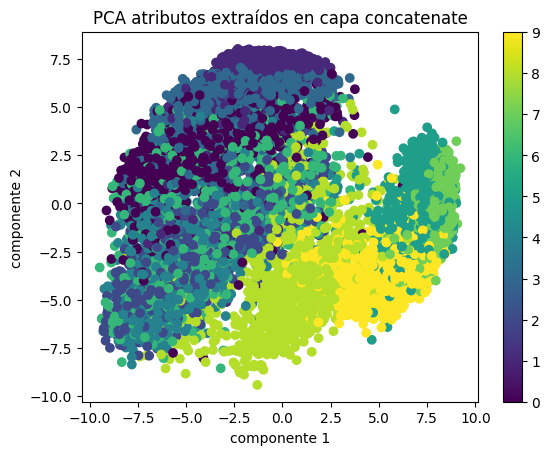

Text(0.5, 1.0, 'PCA atributos extraídos en capa concatenate')

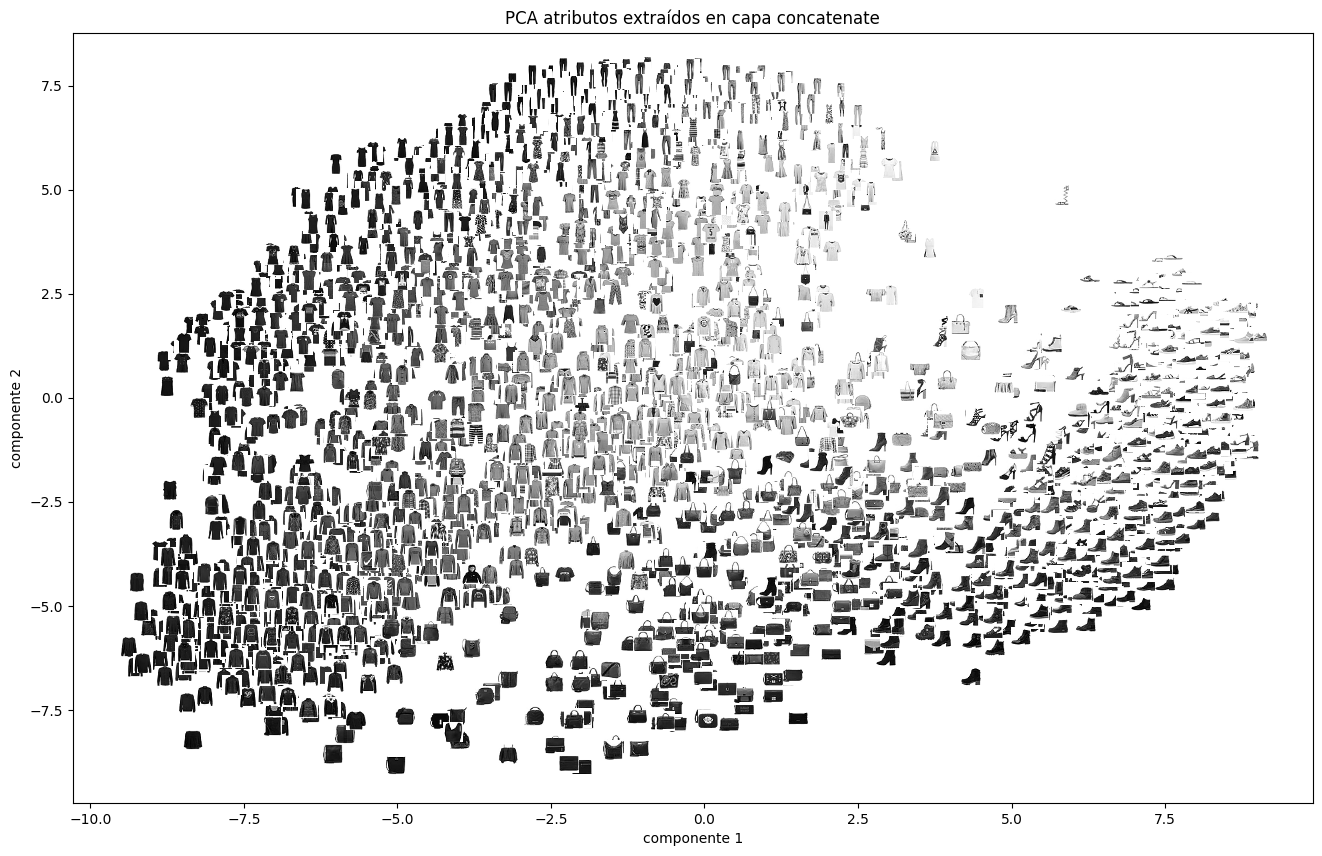

In [3]:
model_A = tf.keras.Model(inputs = model.inputs, outputs = model.get_layer('concatenate').output)
z_A = model_A.predict(x)
# z_A.shape
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#plot mnist 2D
def plot_mnist_2d(Z, y, images, img_w = 28, img_h = 28, zoom = 0.5, cmap = 'jet'):
    fig, ax = plt.subplots(figsize = (16,10))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

zPCA = PCA(n_components=2).fit_transform(z_A)

plt.scatter(zPCA[:,0], zPCA[:,1], c = y)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')
plt.show()

Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0, y.shape[0], Ni)
plot_mnist_2d(zPCA[ind], y[ind], x[ind], img_w = 28, img_h = 28, zoom = 0.5, cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')

###Punto 2:

[2025-06-12 14:48:10.820] [CUML] [info] build_algo set to brute_force_knn because random_state is given


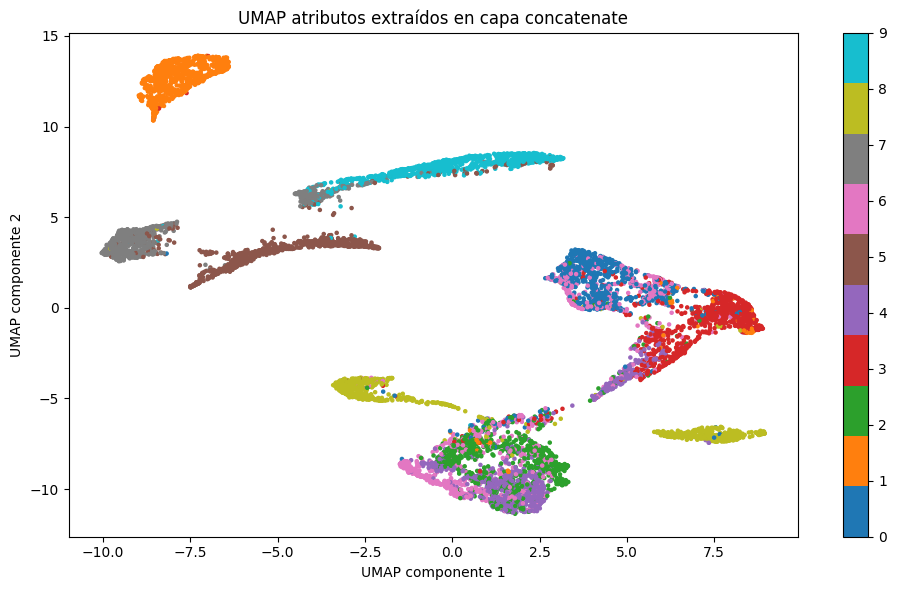

Text(0.5, 1.0, 'UMAP atributos extraídos en capa concatenate')

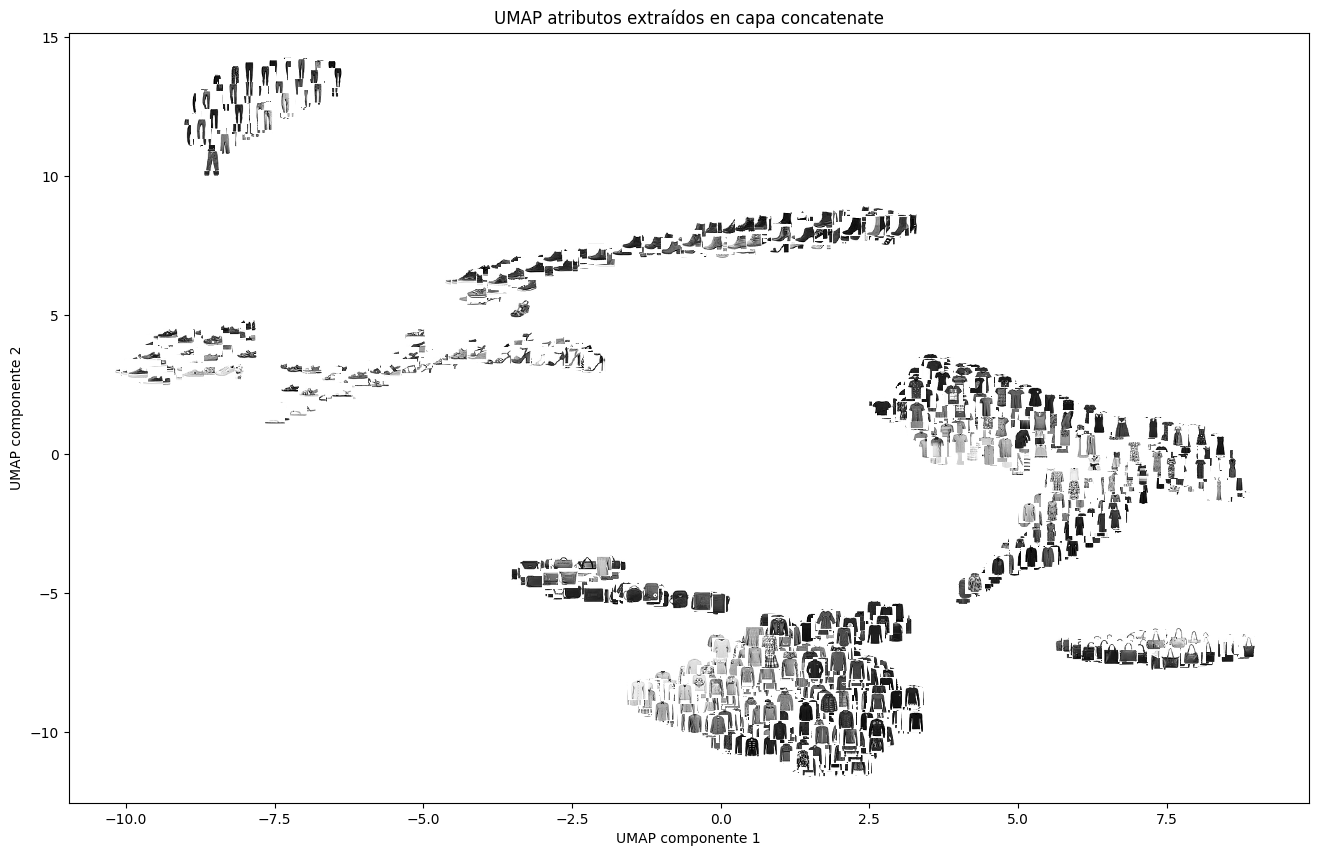

In [4]:
import cupy as cp
from cuml.manifold import UMAP as cuUMAP

# Convertir a cupy para trabajar con cuML
z_A_gpu = cp.asarray(z_A)

# Aplicar UMAP desde RAPIDS (cuML)
umap = cuUMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
zUMAP = umap.fit_transform(z_A_gpu)

# Convertir de nuevo a numpy para graficar
zUMAP = zUMAP.get()

# Visualización básica con color por etiqueta
plt.figure(figsize=(10, 6))
plt.scatter(zUMAP[:, 0], zUMAP[:, 1], c=y, cmap='tab10', s=5)
plt.colorbar()
plt.xlabel("UMAP componente 1")
plt.ylabel("UMAP componente 2")
plt.title("UMAP atributos extraídos en capa concatenate")
plt.tight_layout()
plt.show()

# Visualización con imágenes (subset aleatorio)
Ni = 4000
ind = np.random.randint(0, y.shape[0], Ni)
plot_mnist_2d(zUMAP[ind], y[ind], x[ind], img_w=28, img_h=28, zoom=0.5, cmap='binary')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.title('UMAP atributos extraídos en capa concatenate')


###Punto 3:

In [5]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

train, test = tf.keras.datasets.mnist.load_data()
images, labels = train

# plt.imshow(images[10000,:,:], cmap = 'binary')
# plt.show()
# print(np.unique(labels))

# Normalización de los valores de los pixeles
images = images / 255.
x, y = test
x = x / 255.
images = np.expand_dims(images, -1)
x = np.expand_dims(x, -1)

images_train, images_valid = images[:-5000], images[-5000:]
labels_train, labels_valid = labels[:-5000], labels[-5000:]
# print(images_train.shape, images_valid.shape, x.shape)

variance = [0.05, 0.25]
inputs_train = [images_train]
inputs_valid = [images_valid]
inputs_test = [x]
for var in variance:
    dim = images_train.shape
    tmp = images_train + (np.sqrt(var)*np.random.randn(images_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = images_valid.shape
    tmp = images_valid + (np.sqrt(var)*np.random.randn(images_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = x.shape
    tmp = x + (np.sqrt(var)*np.random.randn(x.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]

# plt.imshow(np.c_[inputs_valid[0][500,:,:,0],inputs_valid[1][500,:,:,0],inputs_valid[2][500,:,:,0]])
# plt.axis('off')
# plt.colorbar()
# plt.show()

#arquitectura funcional
tf.keras.backend.clear_session()

def sharedLayers(inputLayer):
    x = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu')(inputLayer)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Flatten()(x)
    return x

input_l1 = tf.keras.layers.Input(shape = (28, 28, 1), name = 'Clean Input')
input_l2 = tf.keras.layers.Input(shape = (28, 28, 1), name = 'Low Noise Input')
input_l3 = tf.keras.layers.Input(shape = (28, 28, 1), name = 'Noise Input')

# Extracción de características por medio de capas convolucionales
convolutional_layers1 = sharedLayers(input_l1)
convolutional_layers2 = sharedLayers(input_l2)
convolutional_layers3 = sharedLayers(input_l3)

concatenate = tf.keras.layers.concatenate([convolutional_layers1, convolutional_layers2, convolutional_layers3])

# Hacemos converger esas características a una decisión usando capas densas
h1 = tf.keras.layers.Dense(128, activation = 'relu', name = 'h1')(concatenate)
h2 = tf.keras.layers.Dense(64, activation = 'relu', name = 'h2')(h1)

output_lA = tf.keras.layers.Dense(10, activation = "softmax", name = 'Digits')(h2)
output_lB = tf.keras.layers.Dense(2, activation = "softmax", name = 'Parity')(h2)

model = tf.keras.Model(inputs = [input_l1, input_l2, input_l3], outputs = [output_lA, output_lB])
# model.summary()
tf.keras.utils.plot_model(model)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy","accuracy"])

history = model.fit(
    x = {'Clean Input': inputs_train[0], 'Low Noise Input': inputs_train[1], 'Noise Input': inputs_train[2]},
    y = {'Digits': labels_train, 'Parity': labels_train % 2},
    epochs = 10,
    batch_size = 64,
    validation_data = (
        {'Clean Input': inputs_valid[0], 'Low Noise Input': inputs_valid[1], 'Noise Input': inputs_valid[2]},
        {'Digits': labels_valid, 'Parity': labels_valid % 2}
    )
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - Digits_accuracy: 0.8611 - Digits_loss: 0.4345 - Parity_accuracy: 0.9246 - Parity_loss: 0.1758 - loss: 0.6103 - val_Digits_accuracy: 0.9818 - val_Digits_loss: 0.0650 - val_Parity_accuracy: 0.9898 - val_Parity_loss: 0.0310 - val_loss: 0.0970
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - Digits_accuracy: 0.9797 - Digits_loss: 0.0648 - Parity_accuracy: 0.9886 - Parity_loss: 0.0324 - loss: 0.0972 - val_Digits_accuracy: 0.9884 - val_Digits_loss: 0.0376 - val_Parity_accuracy: 0.9932 - val_Parity_loss: 0.0213 - val_loss: 0.0595
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - Digits_accuracy: 0.9876 - Digits_loss: 0.0407 - Parity_accuracy: 0.9921 - Parity_loss: 0.0219 - loss: 0.0626 - val_Digits_accuracy: 0.9892 - val_Digits_loss: 0.0370 - val_Parity_accuracy: 0.9938 - val_Parity_loss: 0.0187 - val_loss: 0.0563
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - Digits_acc

In [6]:
y_labels = y
y_odd_pair = (y % 2)

z = model.predict(
    {'Clean Input': x, 'Low Noise Input': inputs_test[1], 'Noise Input': inputs_test[2]}
)
accuracy = model.evaluate(
    {'Clean Input': x, 'Low Noise Input': inputs_test[1], 'Noise Input': inputs_test[2]},
    {'Digits': y_labels, 'Parity': y_odd_pair}
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Digits_accuracy: 0.9856 - Digits_loss: 0.0505 - Parity_accuracy: 0.9944 - Parity_loss: 0.0197 - loss: 0.0702


In [7]:
z_digits = z[0]
z_digits.shape

(10000, 10)

[2025-06-12 14:50:16.323] [CUML] [info] build_algo set to brute_force_knn because random_state is given


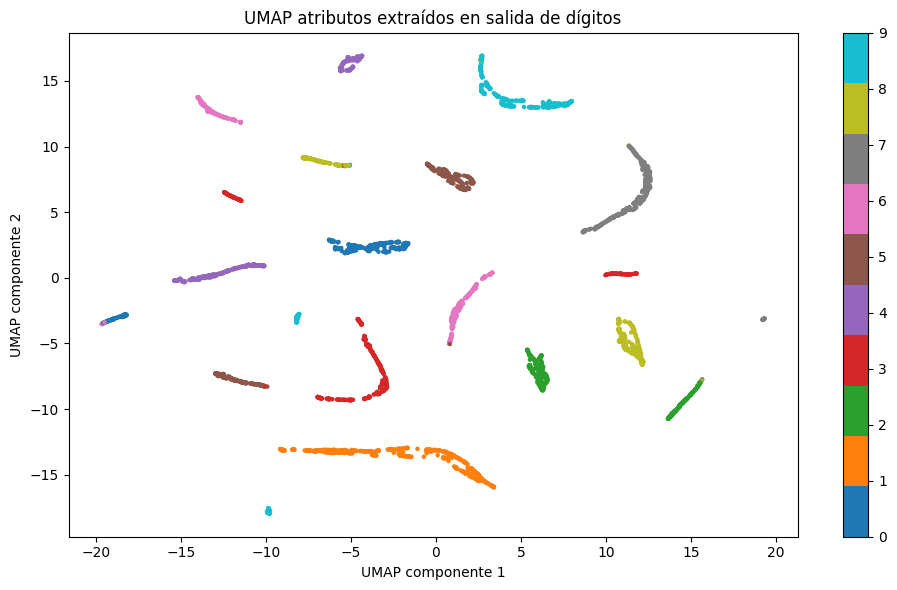

In [8]:
import cupy as cp
from cuml.manifold import UMAP as cuUMAP

# Selección de 4000 muestras aleatorias
n = 4000
ind = np.random.choice(z_digits.shape[0], n, replace=False)
z_n = z_digits[ind, :]
y_n = y[ind]

# Convertir a GPU con cupy
z_n_gpu = cp.asarray(z_n)

# Aplicar UMAP de RAPIDS
umap = cuUMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
zUMAP = umap.fit_transform(z_n_gpu)

# Devolver a NumPy para graficar
zUMAP = zUMAP.get()

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(zUMAP[:, 0], zUMAP[:, 1], c=y_n, cmap='tab10', s=5)
plt.colorbar()
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.title('UMAP atributos extraídos en salida de dígitos')
plt.tight_layout()
plt.show()

In [9]:
z_parity = z[1]
z_parity.shape

(10000, 2)

[2025-06-12 14:50:16.682] [CUML] [info] build_algo set to brute_force_knn because random_state is given


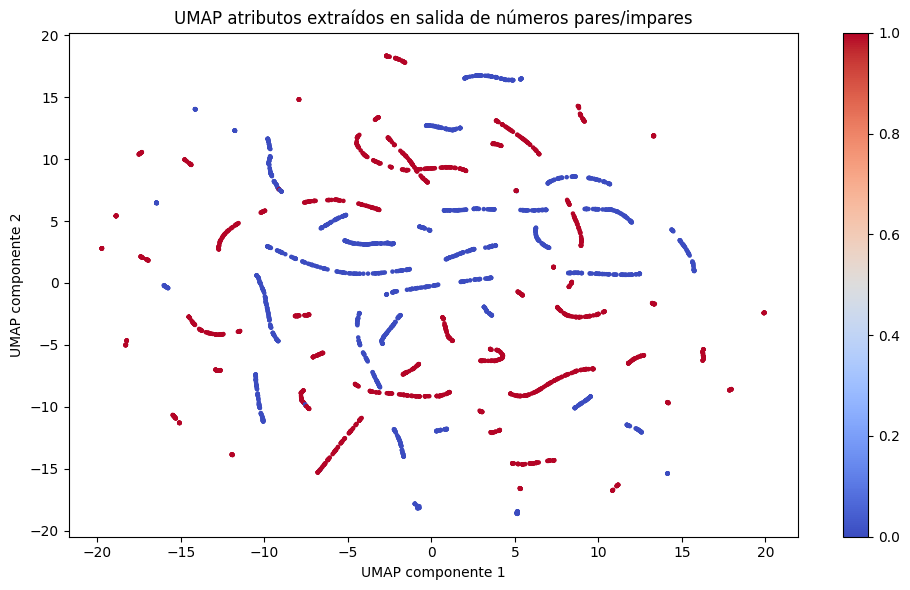

In [10]:
import cupy as cp
from cuml.manifold import UMAP as cuUMAP

# Seleccionar 4000 muestras aleatorias
n = 4000
ind = np.random.choice(z_parity.shape[0], n, replace=False)
z_n = z_parity[ind, :]
y_n = y_odd_pair[ind]

# Convertir a cupy (GPU)
z_n_gpu = cp.asarray(z_n)

# Aplicar UMAP cuML
umap = cuUMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
zUMAP = umap.fit_transform(z_n_gpu)

# Volver a NumPy para visualización
zUMAP = zUMAP.get()

# Visualizar
plt.figure(figsize=(10, 6))
plt.scatter(zUMAP[:, 0], zUMAP[:, 1], c=y_n, cmap='coolwarm', s=5)
plt.colorbar()
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.title('UMAP atributos extraídos en salida de números pares/impares')
plt.tight_layout()
plt.show()
